In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [57]:
print( "All models are wrong, but some are useful." )

All models are wrong, but some are useful.


1. Estimating the likelihood of water

In [69]:
# to estimate Likelihood: 

w = 6   # Number of occurences of the event W
n = 9   # Total number of trials / samples size
p = 0.5 # Probability of sampling W i.e.,
        # the proportion of water on the globe.
        # this variable cannot be observed but can be inferred from the data.

# we calculate the relative number of ways to get 6 W in 9 trials
print(binom.pmf(w, n, p))

0.16406250000000003


What should you learn from this part?
1. The disctintion between variables w, n and p
2. The condition under which p holds. In this case, a binomial distribution given by our assumptions that "a. every toss is independent of the other
tosses and b. the probability of W is the same on every toss.

While w and n are pretty easy to deduce since they are observed variables, p is a tricky one being an unobserved variable. It is in this case our prior and according to page 35, can come from subjective sources such as beliefs or non-subjective, critically explored sources. I understand this to mean that priors come from the theoretical framework which underlies the step 2 of our modelling workflow. It can take any value but it should be theoretically interrogated if we are to work with it.

Additional crucial hidden message at this point is that the distribution we work with can be one other than a binomial distribution. We could decide to look at the world from the perspective of it containing not just water and land but forests, lakes, seas, farms, gardens, homes, parks, etc. Our prior can be more than one. It can be a distriution. 

2. The Bayes Theorem

I like this part and will not dwell on it. Simply watch the 3B1B video and forever imagine probability as counting bricks that make a square. I like Bayes theorem because similar to econometrics, it allows you to imagine the counterfactual - the evidence when the hypothesis is not true.

I imagine that things can quickly get complicated when working with multiple interlinked hypotheses but then there are the multilevel models which we can probably apply to arrive at our answers.

3. Motors

The last part of this chapter explores the motors that Bayesian models work with. Grid approximation, quadratic approximation and MCMC.

In [68]:
# Using numpy.linspace to create sequence of numbers to define a grid of p
p_grid = np.linspace(0, 1, num=20)
print(p_grid)

# define prior
prior = np.repeat(1, 20)
print(prior)

# compute likelihood at each value in the grid
likelihood = binom.pmf(w, n, p_grid)
print(likelihood)

# compute product of likelihood and prior
unstd_posterior = likelihood * prior
print(unstd_posterior)

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
print(posterior)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.00000000e+00 1.51814898e-06 8.18509295e-05 7.77292279e-04
 3.59857537e-03 1.11609461e-02 2.66829865e-02 5.29210991e-02
 9.08269760e-02 1.38341326e-01 1.89768623e-01 2.36114658e-01
 2.66611252e-01 2.71400562e-01 2.45005089e-01 1.89768623e-01
 1.17918118e-01 5.02667021e-02 8.85384487e-03 0.00000000e+00]
[0.00000000e+00 1.51814898e-06 8.18509295e-05 7.77292279e-04
 3.59857537e-03 1.11609461e-02 2.66829865e-02 5.29210991e-02
 9.08269760e-02 1.38341326e-01 1.89768623e-01 2.36114658e-01
 2.66611252e-01 2.71400562e-01 2.45005089e-01 1.89768623e-01
 1.17918118e-01 5.02667021e-02 8.85384487e-03 0.00000000e+00]
[0.00000000e+00 7.98983711e-07 4.30771684e-05 4.09079660e-04
 1.89388732e-03 5.87387288e-03 1.40429377e-02 2.78517436e-02

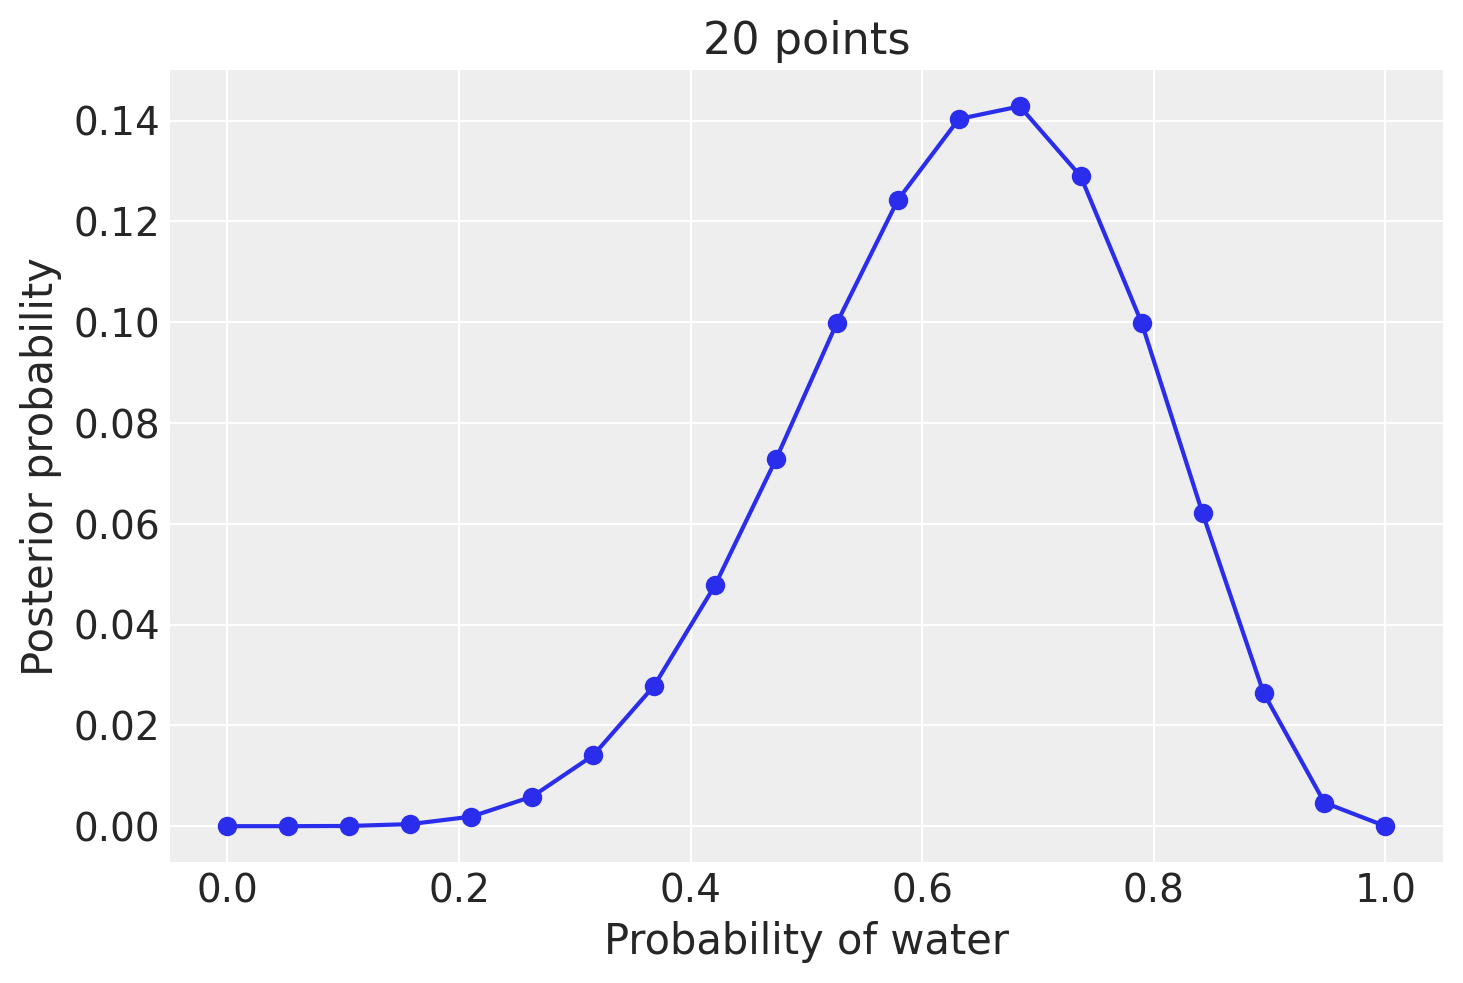

In [67]:
# plot the posterior distribution
plt.plot(p_grid, posterior, 'o-')
plt.xlabel('Probability of water')
plt.ylabel('Posterior probability')
plt.title('20 points')
plt.show()


[0.   0.25 0.5  0.75 1.  ]
[1 1 1 1 1]
[0.         0.00865173 0.1640625  0.2335968  0.        ]
[0.         0.00865173 0.1640625  0.2335968  0.        ]
[0.         0.02129338 0.40378549 0.57492114 0.        ]


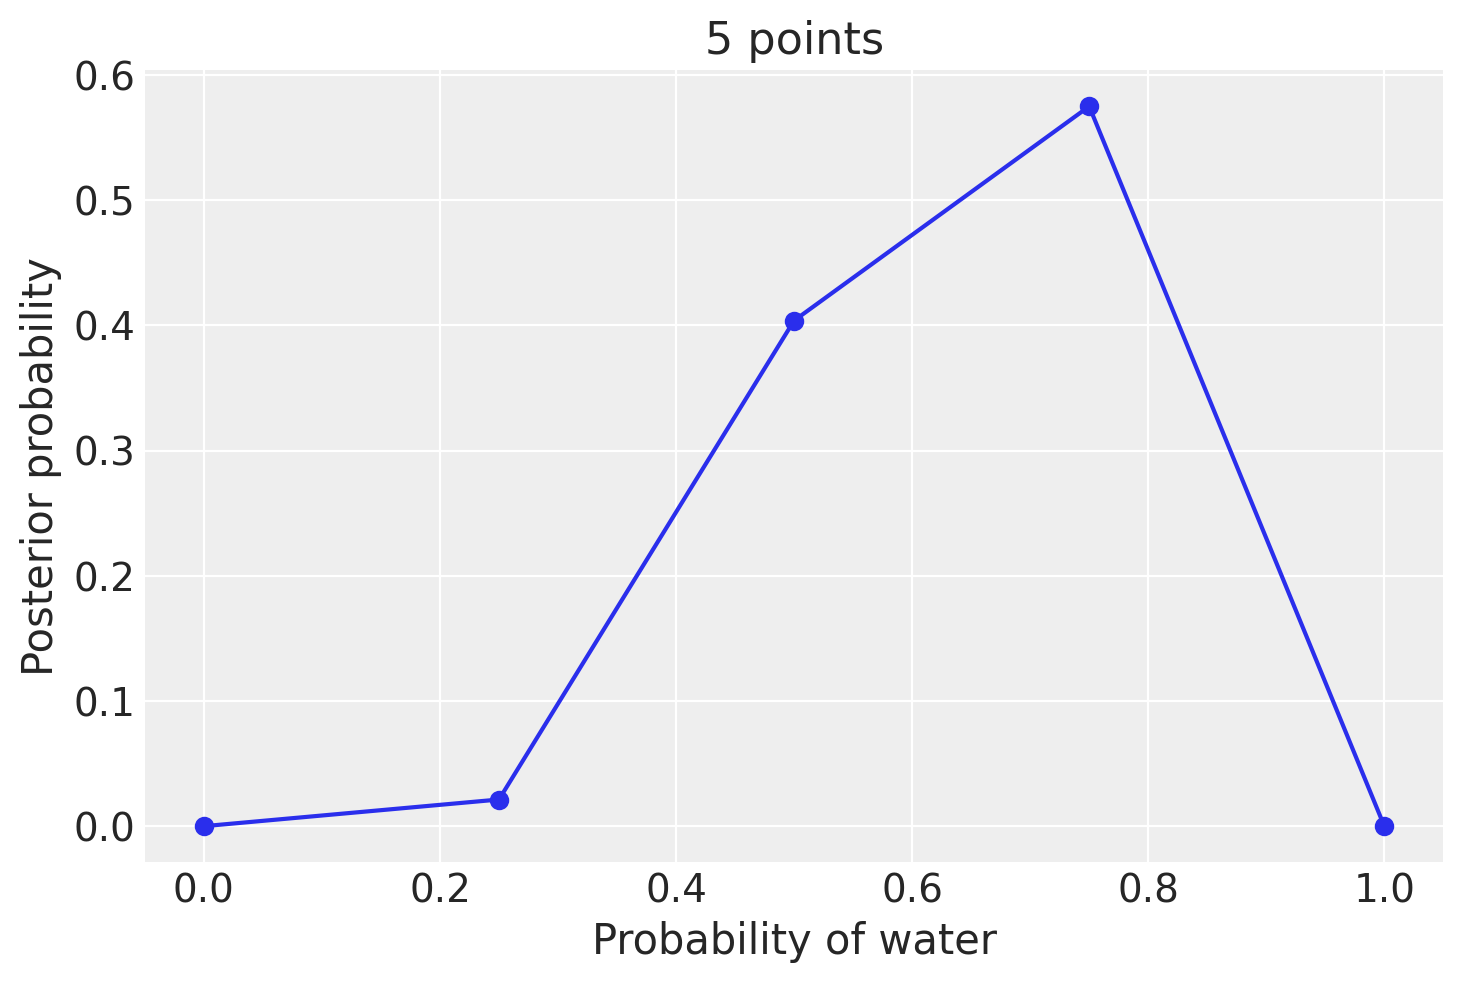

In [70]:
# Using numpy.linspace to create sequence of numbers to define a grid of p
p_grid = np.linspace(0, 1, num=5)
print(p_grid)

# define prior
prior = np.repeat(1, 5)
print(prior)

# compute likelihood at each value in the grid
likelihood = binom.pmf(w, n, p_grid)
print(likelihood)

# compute product of likelihood and prior
unstd_posterior = likelihood * prior
print(unstd_posterior)

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior)
print(posterior)

# plot the posterior distribution
plt.plot(p_grid, posterior, 'o-')
plt.xlabel('Probability of water')
plt.ylabel('Posterior probability')
plt.title('5 points')
plt.show()


[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0.00000000e+00 1.51814898e-06 8.18509295e-05 7.77292279e-04
 3.59857537e-03 1.11609461e-02 2.66829865e-02 5.29210991e-02
 9.08269760e-02 1.38341326e-01 1.89768623e-01 2.36114658e-01
 2.66611252e-01 2.71400562e-01 2.45005089e-01 1.89768623e-01
 1.17918118e-01 5.02667021e-02 8.85384487e-03 0.00000000e+00]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18976862 0.23611466
 0.26661125 0.27140056 0.24500509 0.18976862 0.11791812 0.0502667
 0.00885384 0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.12043392 0.14984676
 0.16920098 0.17224045 0.15548894 0.12043392 0.07483503 0.03190104
 0.00561896 0.    

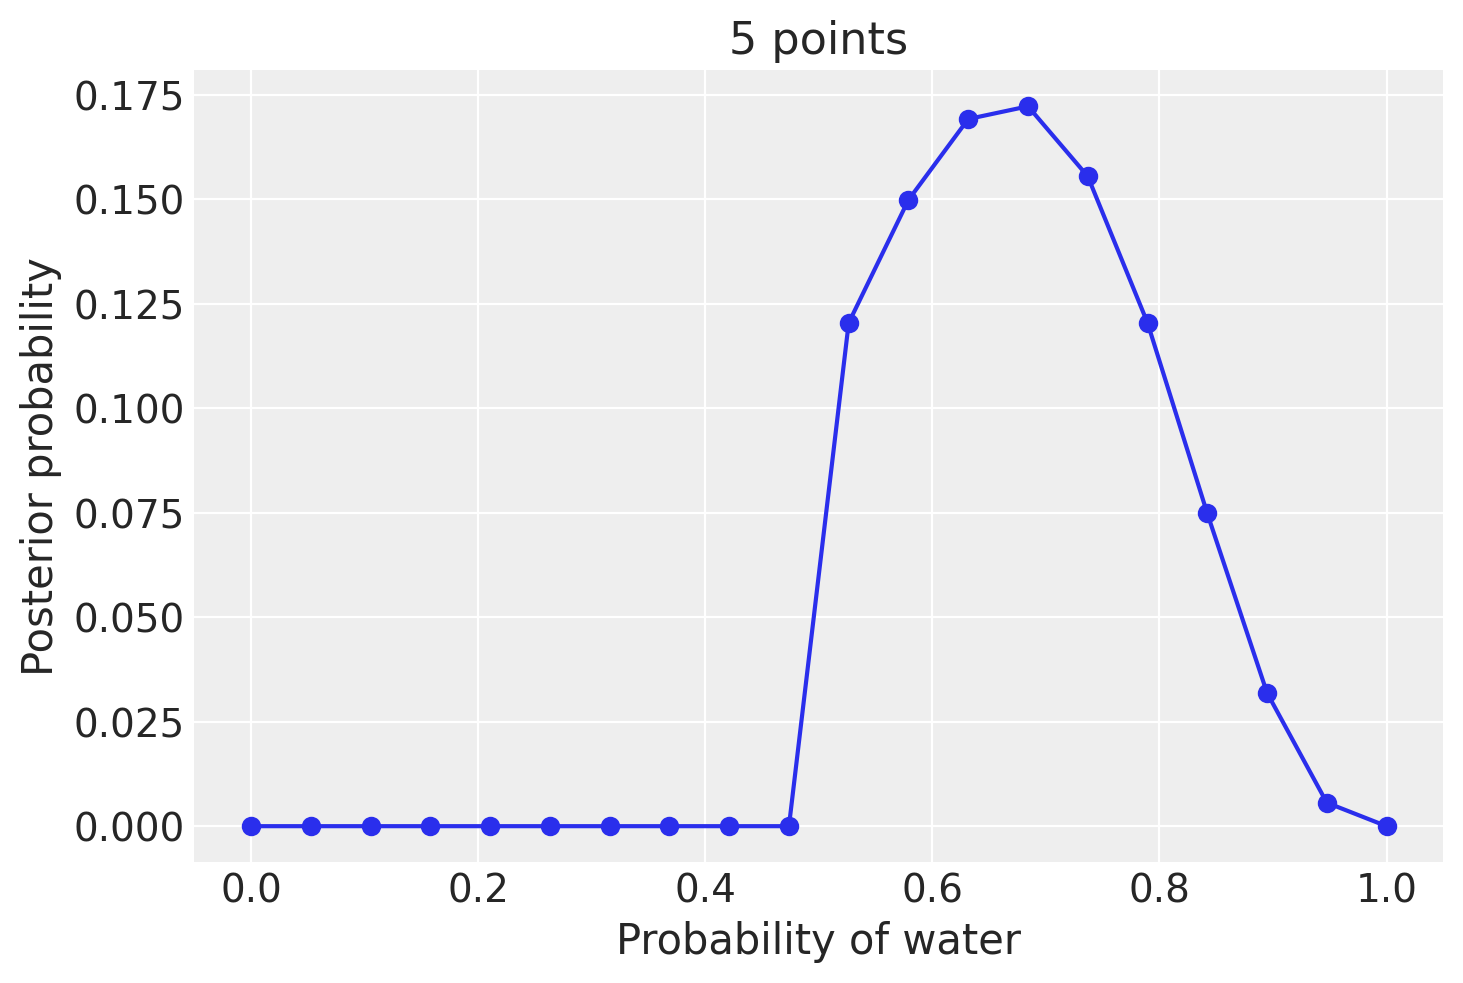

In [71]:
# Using numpy.linspace to create sequence of numbers to define a grid of p
p_grid = np.linspace(0, 1, num=20)
print(p_grid)

# define prior
prior = np.where(p_grid < 0.5, 0, 1)
print(prior)

# compute likelihood at each value in the grid
likelihood = binom.pmf(w, n, p_grid)
print(likelihood)

# compute product of likelihood and prior
unstd_posterior = likelihood * prior
print(unstd_posterior)

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior)
print(posterior)

# plot the posterior distribution
plt.plot(p_grid, posterior, 'o-')
plt.xlabel('Probability of water')
plt.ylabel('Posterior probability')
plt.title('5 points')
plt.show()


[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
[0.082085   0.15335497 0.2865048  0.53526143 1.         0.53526143
 0.2865048  0.15335497 0.082085  ]
[0.00000000e+00 2.14666128e-04 8.65173340e-03 5.70304692e-02
 1.64062500e-01 2.64029950e-01 2.33596802e-01 7.36304820e-02
 0.00000000e+00]
[0.00000000e+00 3.29201170e-05 2.47876312e-03 3.05262104e-02
 1.64062500e-01 1.41325048e-01 6.69266042e-02 1.12916001e-02
 0.00000000e+00]
[0.00000000e+00 7.90126461e-05 5.94936019e-03 7.32669529e-02
 3.93771756e-01 3.39198856e-01 1.60632725e-01 2.71013376e-02
 0.00000000e+00]


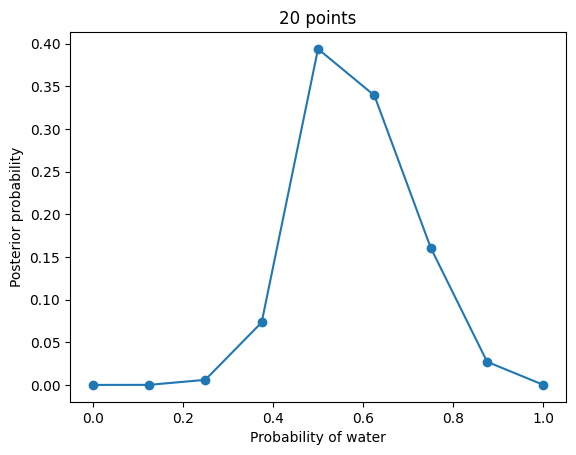

In [42]:
# Using numpy.linspace to create sequence of numbers to define a grid of p
p_grid = np.linspace(0, 1, num=20)
print(p_grid)

# define prior
prior = np.exp(-5 * abs(p_grid - 0.5))
print(prior)

# compute likelihood at each value in the grid
likelihood = binom.pmf(w, n, p_grid)
print(likelihood)

# compute product of likelihood and prior
unstd_posterior = likelihood * prior
print(unstd_posterior)

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior)
print(posterior)

# plot the posterior distribution
plt.plot(p_grid, posterior, 'o-')
plt.xlabel('Probability of water')
plt.ylabel('Posterior probability')
plt.title('20 points')
plt.show()


In [61]:
import jax
import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
%matplotlib inline

In [62]:
data = np.repeat((0, 1), (3, 6)) # 0: land, 1: water, length = W + L = 9
def quad_model(data):
    p = numpyro.sample('p', dist.Uniform(0, 1))
    w = numpyro.sample('w', dist.Binomial(total_count=len(data), probs=p), obs=data.sum())

In [63]:
rng_key = random.PRNGKey(0) #rng_key = Random number generator key to be used for the sampling

#set up MCMC to obtain posterior samples
kernel = NUTS(quad_model) # NUTS is a type of MCMC ssampling algorithm
mcmc = MCMC(kernel, num_warmup=2000, num_samples=2000)
mcmc.run(rng_key, data=data)


post_samples = mcmc.get_samples() #i.e., posterior samples
mcmc.print_summary()

sample: 100%|██████████| 4000/4000 [00:01<00:00, 2921.27it/s, 3 steps of size 8.62e-01. acc. prob=0.94]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         p      0.64      0.14      0.65      0.42      0.85    801.54      1.00

Number of divergences: 0


at num_warmup and num_samples= 100 , mean = 0.62 and std = 0.14
at num_warmup and num_samples= 1000 and 2000, 2000 , mean = 0.64 and std = 0.14

In [37]:
# Calculate mean, std deviation, and HPD interval for p
p_samples = post_samples['p']
p_mean = jnp.mean(p_samples)
p_std = jnp.std(p_samples)

# display summary of quadratic approximation
print("Mean, Standard deviation\np {:.2}, {:.2}".format(p_mean, p_std))

Mean, Standard deviation
p 0.64, 0.14


In [34]:
# Compute the 89% percentile interval
from scipy import stats
norm = stats.norm(p_mean, p_std)
prob = 0.89
z = stats.norm.ppf([(1 - prob) / 2, (1 + prob) / 2])
pi = p_mean + p_std * z
print("5.5%, 94.5% \n{:.2}, {:.2}".format(pi[0], pi[1]))

5.5%, 94.5% 
0.42, 0.86


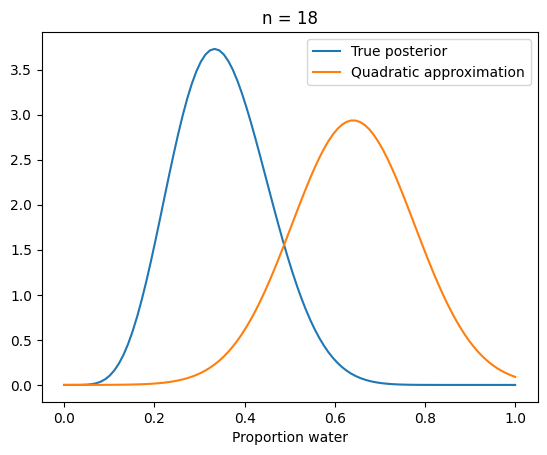

In [51]:
# analytical calculation
w, n = 6, 18
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, w + 1, n - w + 1), label="True posterior")

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, p_mean, p_std), label="Quadratic approximation")
plt.legend(loc=0)

plt.title(f"n = {n}")
plt.xlabel("Proportion water");

In [44]:
from scipy.stats import beta

# Calculate exact Beta posterior mean and std
w, L = 6, 3
mean_exact = (w + 1) / (w + L + 2)
std_exact = ((w + 1) * (L + 1) / ((w + L + 2) ** 2 * (w + L + 3))) ** 0.5

print(f"Exact Mean: {mean_exact:.2f}")
print(f"Exact Standard Deviation: {std_exact:.2f}")


Exact Mean: 0.64
Exact Standard Deviation: 0.14


sample: 100%|██████████| 4000/4000 [00:01<00:00, 2899.36it/s, 3 steps of size 8.62e-01. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         p      0.64      0.14      0.65      0.42      0.85    801.54      1.00

Number of divergences: 0


sample: 100%|██████████| 4000/4000 [00:01<00:00, 2991.98it/s, 3 steps of size 7.96e-01. acc. prob=0.95]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         p      0.65      0.11      0.65      0.48      0.82    855.36      1.00

Number of divergences: 0


sample: 100%|██████████| 4000/4000 [00:01<00:00, 3022.33it/s, 3 steps of size 1.01e+00. acc. prob=0.92]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         p      0.66      0.08      0.66      0.53      0.78    713.06      1.00

Number of divergences: 0


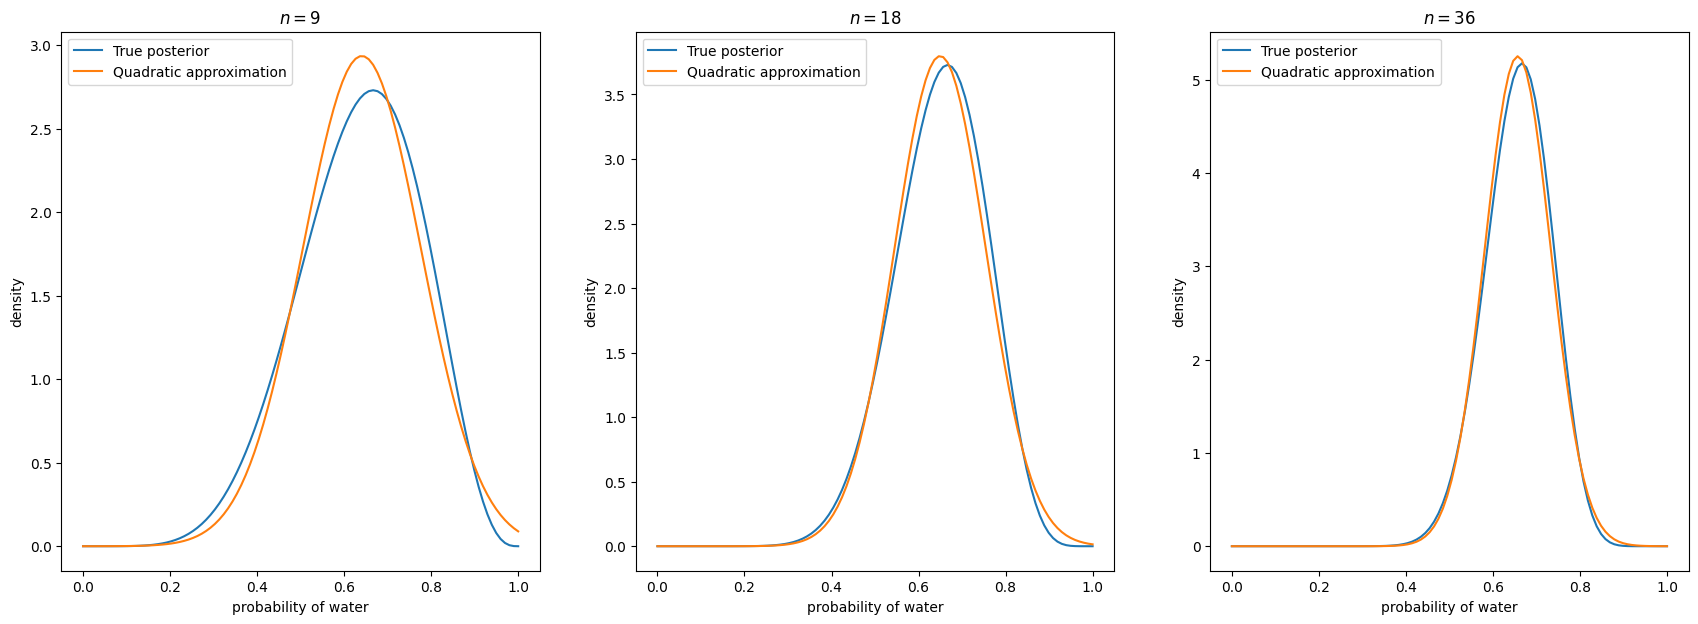

In [54]:
# Figure 2.8
x = np.linspace(0, 1, 100)
w, n = [6, 12, 24], [9, 18, 36]

fig, ax = plt.subplots(1, 3, figsize=(21, 7))

for idx, ps in enumerate(zip(w, n)):
    data = np.repeat((0, 1), (ps[1] - ps[0], ps[0]))
    def quad_model(data):
        p = numpyro.sample('p', dist.Uniform(0, 1))
        w = numpyro.sample('w', dist.Binomial(total_count=len(data), probs=p), obs=data.sum())
    rng_key = random.PRNGKey(0) #rng_key = Random number generator key to be used for the sampling

    #set up MCMC to obtain posterior samples
    kernel = NUTS(quad_model) # NUTS is a type of MCMC ssampling algorithm
    mcmc = MCMC(kernel, num_warmup=2000, num_samples=2000)
    mcmc.run(rng_key, data=data)


    post_samples = mcmc.get_samples() #i.e., posterior samples
    mcmc.print_summary()
    
    # Calculate mean, std deviation, and HPD interval for p
    p_samples = post_samples['p']
    p_mean = jnp.mean(p_samples)
    p_std = jnp.std(p_samples)

    ax[idx].plot(x, stats.beta.pdf(x, ps[0] + 1, ps[1] - ps[0] + 1), label="True posterior")
    ax[idx].plot(x, stats.norm.pdf(x, p_mean, p_std), label="Quadratic approximation")
    ax[idx].set_xlabel("probability of water")
    ax[idx].set_ylabel("density")
    ax[idx].set_title(r"$n={}$".format(ps[1]))
    ax[idx].legend(loc="upper left")